<a href="https://colab.research.google.com/github/abhishekindapure/vscode-settings/blob/master/Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

Importing the dataset

In [102]:
df = pd.read_csv('headbrain.csv')

Analyzing the data

In [103]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [105]:
df['Age Range'].value_counts()

2    127
1    110
Name: Age Range, dtype: int64

In [106]:
df['Gender'].value_counts()

1    134
2    103
Name: Gender, dtype: int64

Seperating Dependent and Independent Variables

In [107]:
y = df['Brain Weight(grams)']
X = df.drop(['Brain Weight(grams)'], axis=1)

In [108]:
X

,Gender,Age Range,Head Size(cm^3)
0,1,1,4512
1,1,1,3738
2,1,1,4261
3,1,1,3777
4,1,1,4177
...,...,...,...
232,2,2,3214
233,2,2,3394
234,2,2,3233
235,2,2,3352


In [109]:
y

0      1530
1      1297
2      1335
3      1282
4      1590
       ... 
232    1110
233    1215
234    1104
235    1170
236    1120
Name: Brain Weight(grams), Length: 237, dtype: int64

In [110]:
X['Head Size(cm^3)'].describe()

count     237.000000
mean     3633.991561
std       365.261422
min      2720.000000
25%      3389.000000
50%      3614.000000
75%      3876.000000
max      4747.000000
Name: Head Size(cm^3), dtype: float64

Splitting data into train and test


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
X_train

,Gender,Age Range,Head Size(cm^3)
183,2,1,3181
201,2,2,3228
230,2,2,3685
95,1,2,3779
190,2,2,3165
...,...,...,...
106,1,2,4032
14,1,1,3832
92,1,2,3662
179,2,1,3533


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


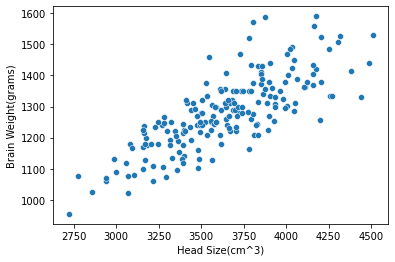

In [113]:
sns.scatterplot(X_train['Head Size(cm^3)'], y_train )

## We can clearly see as the size of the head increases, the weight increases almost linearly


It can be concluded from the graph that gender 1 usually have bigger brain size and hence bigger brain weight than gender 2

Training the model using linear regression


In [114]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [115]:
lin_reg.coef_

array([-14.44971698, -23.65458696,   0.24795719])

In [116]:
y_lin_pred = lin_reg.predict(X_test)

In [117]:
lin_score = mean_squared_error(y_test, y_lin_pred)
lin_score = np.sqrt(lin_score)
lin_score

65.95452567714383

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


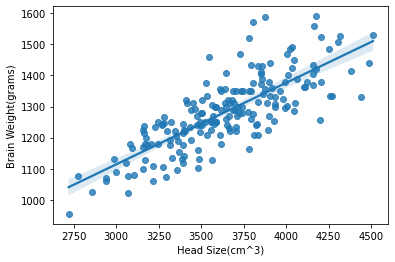

In [122]:
sns.regplot(X_train["Head Size(cm^3)"],y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


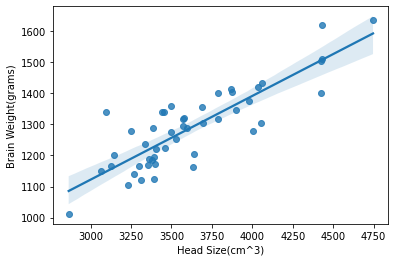

In [123]:
sns.regplot(X_test["Head Size(cm^3)"],y_test)

Using logistic regression

In [118]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [119]:
y_log_pred = log_reg.predict(X_test)

In [120]:
log_score = mean_squared_error(y_test, y_log_pred)
log_score = np.sqrt(log_score)
log_score

113.82058249719161

As we can clearly see, Liner Regression has lower error than Logistic Regression. Hence its a better model for this dataset